
# CS110 Fall 2019 - Assignment 1
# Divide and Conquer Sorting Algorithms

This assignment focuses on the implementation of sorting algorithms and analyzing their performance both mathematically (using theoretical arguments on the asymptotic behavior of algorithms ) and experimentally (i.e., running experiments for different input arrays and plotting relevant performance results). 

Every CS110 assignment begins with a check-up on your class responsibilities and professional standing, as well as your ability to address one of the course LOs #ComputationalSolutions. Thus to complete the first part of this assignment, you will need to take a screenshot of your CS110 dashboard on Forum where the following is visible:
your name.
your absences for the course have been set to excused up to session 2.2 (inclusively).
This will be evidence that you have submitted acceptable pre-class and make-up work for a CS110 session you may have missed. Check the specific CS110 make-up and pre-class policies in the syllabus of the course.


**NOTES:**

1. Your assignment submission needs to include the following resources:
    * A PDF file must be the first resource. This file must be generated from the template notebook where you have written all of the answers (check this link for instructions on how to do this). Make sure that the PDF displays properly (all text and code can be seen within the paper margins).
    * Make sure that you submit a neat, clearly presented, and easy-to-read PDF. Please make sure to include page numbers
    * Your second resource must be the template notebook you have downloaded from the gist provided and where you included your answers. Submit this file directly following the directions in this picture:

<img src="images/upload.png" width="800" height="200">


2. Questions (1)-(7) will be graded on the indicated LOs, please make sure to consult their descriptions and rubrics in the course syllabus. You will not be penalized for not attempting the optional challenge.

3. After completing the assignment, evaluate the application of the HCs you have identified prior to and while you were working on this assignment and footnote them (refer to [these guidelines](https://docs.google.com/document/d/1s7yOVOtMIaHQdKLeRmZbq1gRqwJKfezBsfru9Q6PcHw/edit) on how to incorporate HCs in your work). 
Here are some examples of weak applications of some of the relevant HCs:

    * Example 1: “#algorithms: I wrote an implementation of the Bubble sort”. 
        * This is an extremely superficial use of the HC in a course on Algorithms, and your reference will be graded accordingly. Instead, consider what constitutes an algorithm (see Cormen et al, sections 1.1 and 1.2). Once you have a good definition of an algorithm, think of how this notion helped you approach the implementation of the algorithm, analyze its complexity and understand why it’s important to write an optimal python implementation of the algorithm.
    * Example 2: “#dataviz: I plotted nice curves showing the execution time of bubble sort, or I plotted beautiful curves with different colors and labels.”
        * Again, these two examples are very superficial uses of the HC #dataviz. Instead consider writing down how do the plots and figures helped you interpret, analyze and write concluding remarks from your experiments. Or write about any insight you included in your work that came from being able to visualize the curves.
    * Example 3: “#professionalism: I wrote a nice paper/article that follows all the directions in this assignment.” 
        * By now, you should realize that this is a poor application of the HC #professionalism. Instead, comment on how you actively considered the HC while deciding on the format, length, and style for writing your report.

4. Your code will be tested for similarity using Turnitin, both to other students’ work and examples available online. As such, be sure to cite all references that you used in devising your solution. Any plagiarism attempts will be referred to the ASC.


** Complete the following tasks which will be graded in the designated LOs and foregrounded HCs:**

## Question 1. [HCs #responsibility and #professionalism; #ComputationalSolutions]

Submit a PDF file with a screenshot of your CS110 dashboard with the information described above.



## Question 2. [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Write a Python 3 implementation of the three-way merge sort discussed in class using the code skeleton below. You should also provide at least three test cases (possibly edge cases) that demonstrate the correctness of your code. Your output must be a sorted **Python list**.

### Importing Necessary Packages for all Questions

In [2]:
# Importing numpy to use for arrays and division.
import numpy as np

# Importing math so that we can use the ceiling function. 
import math 

# Importing matplotlib for graphing.
from matplotlib.pylab import plt
%matplotlib inline

# Import random for list generation.
import random

# Importing time for measuring running time. 
import time

### Three-Way Merge Sort

In [3]:
def threeWayMerge(lst):
    """Implements three-way marge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    
    # If the length of the list is zero or one, we immediately return the list as no sorting is necessary.
    if len(lst) > 1: 
        
        # We need to find out where to divide the list. We have to use + 1 to account for Python indexing
        # e.g. as when we have :middle_1, the element in middle_1 is not included.
        middle_1 = (len(lst) + 1) // 3
        
        # We multiply by two to find the other index to divide our list.
        middle_2 = middle_1 * 2
        
        # Afterward, we divide the full list into three different parts by using the indicies
        # we found above.
        list_1 = lst[:middle_1]
        list_2 = lst[middle_1:middle_2]
        list_3 = lst[middle_2:]
        
        # Keep dividing the three lists into sublists via recursion.
        threeWayMerge(list_1)
        threeWayMerge(list_2)
        threeWayMerge(list_3)
    
        # Initializing the indicies at 0.
        index1 = 0
        index2 = 0
        index3 = 0
        m = 0
        
        # Finding the lengths of each list so that we can refer to them in the 
        # while loops.
        len1 = len(list_1)
        len2 = len(list_2)
        len3 = len(list_3)
        
        # We keep going in this loop if all lists still have elements left.
        while index1 < len1 and index2 < len2 and index3 < len3:
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2] and list_1[index1] < list_3[index3]:                
                lst[m] = list_1[index1]                
                index1 += 1
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            elif list_2[index2] < list_1[index1] and list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                index2 += 1
            
            # If neither the current element in list 1 or list 2 is the smallest then
            # it is the element in list 3 which we add to our current list. Then we
            # increase index 3 by 1.
            else:                
                lst[m] = list_3[index3]                
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 2 have elements left.
        while index1 < len1 and index2 < len2:
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2]:
                lst[m] = list_1[index1]
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 2 is. We add that element to our overall list and increase
            # our index 2 counter by 1.
            else:
                lst[m] = list_2[index2]
                index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 3 have elements left.
        while index1 < len1 and index3 < len3:
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_3[index3]:
                lst[m] = list_1[index1]                
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else: 
                lst[m] = list_3[index3]
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 2 and list 3 have elements left.
        while index2 < len2 and index3 < len3:
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            if list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                index2 += 1
            
            # If the current element in list 2 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else:
                lst[m] = list_3[index3]
                index3 += 1

            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 2 and list 3, we copy the rest of list 1
        # into lst.
        while index1 < len1:
            lst[m] = list_1[index1]
            index1 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 3, we copy the rest of list 2
        # into lst.
        while index2 < len2:
            lst[m] = list_2[index2]
            index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 2, we copy the rest of list 3
        # into lst.
        while index3 < len3:
            lst[m] = list_3[index3]
            index3 += 1
            
            # Increasing the overall index counter.
            m += 1

    # Converting the array to a Python list if it is a numpy array. Otherwise, we immediately return the list.
    if type(lst) != list:
        lst = np.array(lst).tolist()
        return lst
    else: 
        return lst 
    
    #raise NotImplementedError()

# Testing

# Empty list:
print(threeWayMerge([]))

# List with a number of elements that do not evenly divide by three:
print(threeWayMerge([32, 6, 2, 87, 52]))

# List with a number of elements that can evenly be divided by three:
print(threeWayMerge([85, 51, 65, 2, 96, 4]))

# List with negative numbers:
print(threeWayMerge([6, -1, 3, 9, -42, 22, -5]))

# List with similar elements:
print(threeWayMerge([6, -1, 3, 9, -42, 22, -5, 3, 9]))

# List with floats:
print(threeWayMerge([5.3, 2.4, 5.3, 6, 2, 8, 55.3, 0.4]))

# Input which is a numpy array - also printing out the type to check that the output is a Python list:
print(type(threeWayMerge(np.array([-40, 3, 6.4, 53, 8.4]))))

[]
[2, 6, 32, 52, 87]
[2, 4, 51, 65, 85, 96]
[-42, -5, -1, 3, 6, 9, 22]
[-42, -5, -1, 3, 3, 6, 9, 9, 22]
[0.4, 2, 2.4, 5.3, 5.3, 6, 8, 55.3]
<class 'list'>


In [4]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 3.  [(#SortingAlgorithms, #PythonProgramming, #CodeReadability, #ComputationalCritique] 

Implement a second version of a three-way merge sort that calls selection sort when sublists are below a certain length (of your choice) rather than continuing the subdivision process. Justify what might be an appropriate threshold for the input array for applying selection sort.

### Selection Sort Code From My 2.1 Pre-Class Work

In [5]:
def selectionSort(A):

    n = len(A) # Finding the length of A.
    for i in range(n-1): # The for loop should run in a range from the first to the last element.
        minidx = i # Initializing the index for the minimum value's index.
    
        # The for loop should run in a range from the element to the right of the current element at i up to the last element.
        for j in range(i + 1, n, 1): 
            
            # If the element at j is smaller than the current smallest element, we swab them. 
            if A[j] < A[minidx]:
                current = A[j] 
                A[j] = A[minidx]
                A[minidx] = current 
    
    # Returning the final array.
    return A

### Extended Three-Way Merge Sort

In [6]:
def extendedThreeWayMerge(lst):
    """Implements the second version of a three-way merge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    
    # The selection-sort process happens if either of the three lists have a length that is smaller than the
    # threshold.
    if len(lst) < 20: 
        
        lst = selectionSort(lst)
    
    else:
        
        # We need to find out where to divide the list. We have to use + 1 to account for Python indexing.
        middle_1 = (len(lst) + 1) // 3
        
        # We multiply by two to find the other index to divide our list.
        middle_2 = middle_1 * 2
        
        # Afterward, we divide the full list into three different parts by using the indicies
        # we found above.
        list_1 = lst[:middle_1]
        list_2 = lst[middle_1:middle_2]
        list_3 = lst[middle_2:]
        
        # Keep dividing the three lists into sublists via recursion.
        extendedThreeWayMerge(list_1)
        extendedThreeWayMerge(list_2)
        extendedThreeWayMerge(list_3)
    
        # Initializing the indicies at 0.
        index1 = 0
        index2 = 0
        index3 = 0
        m = 0
        
        # Finding the length of each list so that we can refer to it in the 
        # while loops.
        len1 = len(list_1)
        len2 = len(list_2)
        len3 = len(list_3)
        
        # We keep going in this loop if all lists still have elements left.
        while index1 < len1 and index2 < len2 and index3 < len3:
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2] and list_1[index1] < list_3[index3]:                
                lst[m] = list_1[index1]                
                index1 += 1
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            elif list_2[index2] < list_1[index1] and list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                index2 += 1
            
            # If neither the current element in list 1 or list 2 is the smallest then
            # it is the element in list 3 which we add to our current list. Then we
            # increase index 3 by 1.
            else:                
                lst[m] = list_3[index3]                
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 2 have elements left.
        while index1 < len1 and index2 < len2:
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2]:
                lst[m] = list_1[index1]
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 2 is. We add that element to our overall list and increase
            # our index 2 counter by 1.
            else:
                lst[m] = list_2[index2]
                index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 3 have elements left.
        while index1 < len1 and index3 < len3:
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_3[index3]:
                lst[m] = list_1[index1]                
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else: 
                lst[m] = list_3[index3]
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 2 and list 3 have elements left.
        while index2 < len2 and index3 < len3:
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            if list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                index2 += 1
            
            # If the current element in list 2 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else:
                lst[m] = list_3[index3]
                index3 += 1

            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 2 and list 3, we copy the rest of list 1
        # into lst.
        while index1 < len1:
            lst[m] = list_1[index1]
            index1 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 3, we copy the rest of list 2
        # into lst.
        while index2 < len2:
            lst[m] = list_2[index2]
            index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 2, we copy the rest of list 3
        # into lst.
        while index3 < len3:
            lst[m] = list_3[index3]
            index3 += 1
            
            # Increasing the overall index counter.
            m += 1

    # Converting the array to a Python list if it is a numpy array. Otherwise, we immediately return the list.
    if type(lst) != list:
        lst = np.array(lst).tolist()
        return lst
    else: 
        return lst 
    
    #raise NotImplementedError()

# Testing

# Empty list:
print(extendedThreeWayMerge([]))

# List with a number of elements that do not evenly divide by three:
print(extendedThreeWayMerge([32, 6, 2, 87, 52]))

# List with a number of elements that can evenly be divided by three:
print(extendedThreeWayMerge([85, 51, 65, 2, 96, 4]))

# List with negative numbers:
print(extendedThreeWayMerge([6, -1, 2, 6, -1, 2, -3]))

# List with similar elements:
print(extendedThreeWayMerge([6, -1, 3, 9, -42, 22, -5, 3, 9]))

# List with floats:
print(threeWayMerge([5.3, 2.4, 5.3, 6, 2, 8, 55.3, 0.4]))

# Input which is a numpy array - also printing out the type to check that the output is a Python list:
print(type(extendedThreeWayMerge(np.array([8, 4, 1, 76, 2, 43, 6, 6, 3, 4, 5]))))

[]
[2, 6, 32, 52, 87]
[2, 4, 51, 65, 85, 96]
[-3, -1, -1, 2, 2, 6, 6]
[-42, -5, -1, 3, 3, 6, 9, 9, 22]
[0.4, 2, 2.4, 5.3, 5.3, 6, 8, 55.3]
<class 'list'>


In [7]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

### Analysis: When to call selection sort? 

To determine what the threshold, k, for calling selection sort should be, I initially graphed the merge sort and selection sort algorithms for different input sizes. I did this as I thought that it would allow me to understand better how the running times of both algorithms varied with the number of inputs (Figure 1 below).

I was looking for the input number when the two curves intersect because, after this point, merge sort would become faster than selection sort. In the graph, this showed to be somewhere around an input of 50. However, I checked this value by graphing both smaller and larger values of k and saw that the run time became better even when k is below 50.

Then, I realized that it is probably because we cannot directly compare three-way merge sort and selection sort because we have to implement them together. For example, if we have a list of 9 elements, divide it into three lists with three elements and enter selection sort, then we would only be performing selection sort on a part of the list length. Thus, the time for the selection sort in the graph below does not adequately represent what the run time would be when it is implemented into the three-way merge sort.

Instead, I decided to graph the running time for different values of k on the same list (Figures 2 and 3 below). Here, I can see that the lowest running time happens when k is somewhere between 15 and 45. Therefore, I also graphed the running time of these values of k for different inputs to test which one minimizes the run time (similar to the graphs in Question 6). Here, I found that the run time was minimized when the value of k is at the lower end of the interval. 

However, this is not the exact minimum threshold. We would have to run each input in the estimated interval to find the best one and also to ensure that the data is precise. Thus, based on the interval and the results I have gotten from further graphing, I will estimate and set the threshold at k = 20. The latter means that when a sublist has less than 20 elements, selection sort will take over.

### Graphing the Running time for Selection Sort and and Three-Way Merge Sort

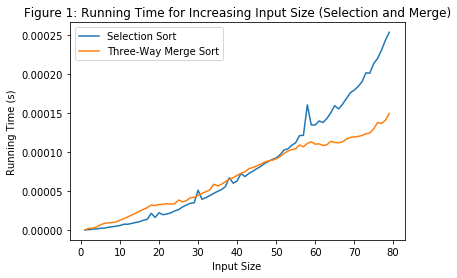

In [8]:
# Creating list for the input size (x-axis).
input_size_list = []

# Creating lists for average running times.
average_merge_list = []
average_selection_list = []

# Number of runs.
run_number = 15

# Creating lists of different lengths.
for input_size in range(1, 80, 1):
    
    # The current list will be passed to the function below. It is in reverse order and starts with zero
    # elements.
    current_list = list(range(input_size-1, 0, -1))
    
    # We append a random number at the end of the current list to introduce some randomness.
    # Thus, the first list will have a list with the element 0.
    random_number = np.random.randint(0, input_size)
    current_list.append(random_number)
    
    # Creating a list with random numbers of the input size.
    #current_list = random.sample(range(1, input_size), input_size-1)
    
    # Appending the len of the current list to the input list to keep track of the input size.
    input_size_list.append(len(current_list))
    
    # Creating list for the running times for each algorithm.
    running_time_merge = []
    running_time_selection = []
    
    # Running the for loop the specified number of times.
    for i in range(run_number):
        
        #Measuring the time of merge sort.
        start_merge = time.time()
        threeWayMerge(current_list)
        end_merge = time.time()
        running_time_merge.append(end_merge - start_merge)

        #Measuring the time of three-way merge sort.
        start_selection = time.time()
        selectionSort(current_list)
        end_selection = time.time()
        running_time_selection.append((end_selection - start_selection)) 

    # Finding the average run times and appending them to the corresponding lists.
    merge_average = sum(running_time_merge) / len(running_time_merge)
    selection_average = sum(running_time_selection) / len(running_time_selection)
    average_merge_list.append(merge_average)
    average_selection_list.append(selection_average)

# Plotting the input size and running times. 
plot_1 = plt.figure(1)
plt.plot(input_size_list, average_selection_list)
plt.plot(input_size_list, average_merge_list)
plt.title("Figure 1: Running Time for Increasing Input Size (Selection and Merge)")
plt.xlabel("Input Size")
plt.ylabel("Running Time (s)")
plt.legend(['Selection Sort', 'Three-Way Merge Sort'])
plt.show()

### Graphing Extended Three-Way Merge Sort for Increasing Values of k

In [9]:
def extendedThreeWayMerge_k(lst, k):
    """Implements the second version of a three-way merge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    
    # The selection-sort process happens if either of the three lists have a length that is smaller than the
    # determined length.
    if len(lst) < k: #itishere
        
        lst = selectionSort(lst)
    
    else:
        
        # We need to find out where to divide the list. We have to use + 1 to account for Python indexing.
        middle_1 = (len(lst) + 1) // 3
        
        # We multiply by two to find the other index to divide our list.
        middle_2 = middle_1 * 2
        
        # Afterward, we divide the full list into three different parts by using the indicies
        # we found above.
        list_1 = lst[:middle_1]
        list_2 = lst[middle_1:middle_2]
        list_3 = lst[middle_2:]
        
        # Keep dividing the three lists into sublists via recursion.
        extendedThreeWayMerge_k(list_1, k)
        extendedThreeWayMerge_k(list_2, k)
        extendedThreeWayMerge_k(list_3, k)
    
        # Initializing the indicies at 0.
        index1 = 0
        index2 = 0
        index3 = 0
        m = 0
        
        # Finding the length of each list so that we can refer to it in the 
        # while loops.
        len1 = len(list_1)
        len2 = len(list_2)
        len3 = len(list_3)
        
        # We keep going in this loop if all lists still have elements left.
        while index1 < len1 and index2 < len2 and index3 < len3:
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2] and list_1[index1] < list_3[index3]:                
                lst[m] = list_1[index1]                
                index1 += 1
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            elif list_2[index2] < list_1[index1] and list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                index2 += 1
            
            # If neither the current element in list 1 or list 2 is the smallest then
            # it is the element in list 3 which we add to our current list. Then we
            # increase index 3 by 1.
            else:                
                lst[m] = list_3[index3]                
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 2 have elements left.
        while index1 < len1 and index2 < len2:
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2]:
                lst[m] = list_1[index1]
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 2 is. We add that element to our overall list and increase
            # our index 2 counter by 1.
            else:
                lst[m] = list_2[index2]
                index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 3 have elements left.
        while index1 < len1 and index3 < len3:
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_3[index3]:
                lst[m] = list_1[index1]                
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else: 
                lst[m] = list_3[index3]
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 2 and list 3 have elements left.
        while index2 < len2 and index3 < len3:
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            if list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                index2 += 1
            
            # If the current element in list 2 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else:
                lst[m] = list_3[index3]
                index3 += 1

            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 2 and list 3, we copy the rest of list 1
        # into lst.
        while index1 < len1:
            lst[m] = list_1[index1]
            index1 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 3, we copy the rest of list 2
        # into lst.
        while index2 < len2:
            lst[m] = list_2[index2]
            index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 2, we copy the rest of list 3
        # into lst.
        while index3 < len3:
            lst[m] = list_3[index3]
            index3 += 1
            
            # Increasing the overall index counter.
            m += 1

    # Converting the array to a Python list if it is a numpy array. Otherwise, we immediately return the list.
    if type(lst) != list:
        lst = np.array(lst).tolist()
        return lst
    else: 
        return lst 

<function matplotlib.pyplot.show(*args, **kw)>

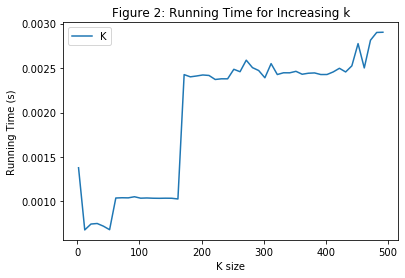

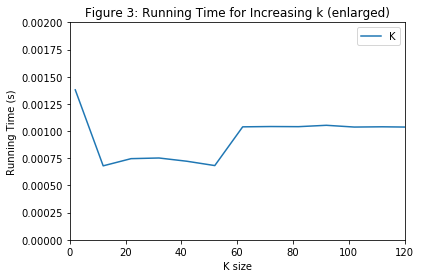

In [10]:
# Setting the value that k should start at.
the_k = 500

# Creating a list with numbers from k to 0 in reversed order.
current_list = list(range(the_k, 0, -1))

# Determining how many times the function should run.
run_number = 25

# Creating a list for the number of k (x-axis).
k_list = []

# Creating a list for the run time for each k-value (y-axis).
running_time_k = []

# Running the function for increasing k-values.
for k in range(2, the_k, 10):

    # Appending the number of k to the k-value list.
    k_list.append(k)
    
    # Initializing the current k value list so that we can use it to find the average run time.
    running_k = []
    
    # Running the function for the specified number of times.
    for i in range(run_number):

        #Measuring the time of the extended three-way merge sort.
        start_k = time.time()
        extendedThreeWayMerge_k(current_list, k)
        end_k = time.time()
        time_k = end_k - start_k
        running_k.append(time_k)

    # Finding the average run time and appending it to the run time list.
    average_k = sum(running_k) / len(running_k)
    running_time_k.append(average_k)

# Plotting the input size and running times. 
plotk1 = plt.figure(1)
plt.plot(k_list, running_time_k)
plt.title("Figure 2: Running Time for Increasing k")
plt.xlabel("K size")
plt.ylabel("Running Time (s)")
plt.legend(['K'])

# Enlarging the figure by changing the x-axis scale.
plotk2 = plt.figure(2)
plt.plot(k_list, running_time_k)
plt.axis([0, 120, 0, 0.0020])
plt.title("Figure 3: Running Time for Increasing k (enlarged)")
plt.xlabel("K size")
plt.ylabel("Running Time (s)")
plt.legend(['K'])
plt.show

## Question 4 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

Bucket sort (or Bin sort) is an algorithm that takes as inputs an $n$-element array and the number of buckets, $k$, to be used during sorting.  Then, the algorithm distributes the elements of the input array into $k$-different buckets and proceeds to sort the individual buckets. Then, merges the sorted buckets to obtained the sorted array. Here is pseudocode for the BucketSort algorithm:

<img src="images/bucket.png" width="800" height="200">

The BucketSort above calls the function **GetBucketNum** (see the pseudocode below) to distribute all the elements of array $A$ into $k$-buckets.  Every element in the array is assigned a bucket number based on its value (positive or negative numbers). **GetBucketNum** returns the bucket number that corresponds to element $A[i]$.   It takes as inputs the element of the array, $A[i]$, the max and min elements in $A$, the size of the intervals in every bucket (e.g., if you have numbers with values between 0 and 100 numbers and 5 buckets, every bucket has an interval of size $20 = [100-0]/5$).  Notice that in pseudocode the indices of the arrays are from 1 to $n$. Thus, GetBucketNum consistently returns a number between 1 and $n$ (make sure you account for this in your Python program).

<img src="images/getbucketnum.png" width="800" height="200">

Write a Python 3 implementation of BucketSort that uses the selection sort algorithm for sorting the individual buckets in line 10 of the algorithm.

In [11]:
def getBucketNum(a, mn, mx, sz, k):
    
    # If the current element from the bucketSort for loop is the largest element in the
    # list we assign it to the bucket with the biggest index number. 
    if a == mx: 
        # We use k - 1 to account for Python indexing that starts at 0. Otherwise, we
        # would get a list index error.
        j = k-1 
    
    # If the current element from the bucketSort for loop is the smallest element in the
    # list we assign it to the bucket with the smallest index number.
    elif a == mn:
        j = 0 #Similarly, we use j = 0 to start at the first bucket.

    # If the element is neither the smallest or largest element, we need to determine which
    # bucket it should go into.
    else:
        j = 1 # We start j at one because we already know that a > mn.
        
        # Here we use mn + sz*j because we want to determine which "bucket range" the 
        # current element falls into. 
        while a > mn + (sz * j): 
            j += 1
        j -= 1 # We need to subtract 1 from j to account for Python indexing. 
    
    # Returning the bucket number/index for the current element.
    return j

def bucketSort(lst, k):
    """Implements BucketSort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    
    # Checking if the length of the list is greater than one because no sorting is needed
    # if the list contains zero or one element only. 
    if len(lst) > 1: 
    
        # Finding the minimum and maximum value in the list.
        mn = min(lst)
        mx = max(lst)

        # Finding the range for each bucket. 
        sz = math.ceil((mx - mn) / k)
        
        # Creating a list that will contain the buckets.
        buckets = [] 

        # Creating k sublists inside "buckets" for the actual buckets by appending empty 
        # lists.
        for i in range(k):
            buckets.append([]) 

        # For every element in the list, we call getBucketNum to determine which bucket
        # the element should go in to. 
        for i in range(0, len(lst)-1):
            b = getBucketNum(lst[i], mn, mx, sz, k)
            
            # Appending the current element into the list with the bucket number we determined
            # above.
            buckets[b].append(lst[i])

        # We need to sort every bucket so we use range from 0 to the last bucket.
        for m in range(0, k):
            
            # We only need to do selection sort if the bucket contains more than one element
            # as a list with zero or one elements would already be sorted.
            if len(buckets[m]) > 1: 
                
                # Performing selection sort on the current bucket.
                selectionSort(buckets[m])

        # Reset the initial list so that we can extend it with our sorted bucket lists.
        lst = []

        # We extend the list, with all of the sorted buckets from the smallest to largest.
        for p in range(0, k):
            lst.extend(buckets[p])
    
    # Converting the array to a Python list if it is a numpy array. 
    # Otherwise, we immediately return the list.
    if type(lst) != list:
        lst = np.array(lst).tolist()
        return lst
    else: 
        return lst
    
    #raise NotImplementedError()

# Testing

# Empty list:
print(bucketSort([], 2))

# List with a number of elements that do not evenly divide by three:
print(bucketSort([32, 6, 2, 87, 52], 2))

# List with a number of elements that can evenly be divided by three:
print(bucketSort([85, 51, 65, 2, 96, 4], 2))

# List with negative numbers:
print(bucketSort([6, -1, 3, 9, -42, 22, -5], 2))

# List with similar elements:
print(bucketSort([6, -1, 3, 9, -42, 22, -5, 3, 9], 2))

# List with floats:
print(threeWayMerge([5.3, 2.4, 5.3, 6, 2, 8, 55.3, 0.4]))

# Input which is a numpy array - also printing out the type to check that the output is a Python list:
print(type(bucketSort(np.array([8, 4, 1, 76, 2, 43, 6]), 2)))

[]
[2, 6, 32, 87]
[2, 51, 65, 85, 96]
[-42, -1, 3, 6, 9, 22]
[-42, -5, -1, 3, 3, 6, 9, 22]
[0.4, 2, 2.4, 5.3, 5.3, 6, 8, 55.3]
<class 'list'>


In [12]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 5 [#SortingAlgorithms, #PythonProgramming, #CodeReadability] 

 Implement a second version of the BucketSort algorithm. This time in line 10 of BucketSort use the Bucket sort recursively until the size of the bucket is less than or equal to k, the base case for the recursion.



In [13]:
def extendedBucketSort(lst, k):
    """Implements the second version of the BucketSort algorithm
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    k: int, length of lst
    
    Output: a sorted Python list"""
    
    # Checking if the length of the list is greater than one because no sorting is needed
    # if the list contains zero or one element only. 
    if len(lst) > 1: 
    
        # Finding the minimum and maximum value in the list.
        mn = min(lst)
        mx = max(lst)
        
        # Finding the range for each bucket. 
        sz = math.ceil((mx - mn) / k)
        
        # Creating a list that will contain the buckets.
        buckets = [] 

        # Creating k sublists inside "buckets" for the actual buckets by appending empty 
        # lists.
        for i in range(k):
            buckets.append([]) 

        # For every element in the list, we call getBucketNum to determine which bucket
        # the element should go in to. 
        for i in range(0, len(lst)):
            b = getBucketNum(lst[i], mn, mx, sz, k)
            
            # Appending the current element into the list with the bucket number we determined
            # above.
            buckets[b].append(lst[i])

        # We need to sort every bucket so we use range from 0 to the last bucket.
        for m in range(0, k):

            # Performing selection sort when the bucket length is less than or equal to k.
            # However, we only need to do selection sort if the bucket contains more than one element
            # as a list with zero or one elements would already be sorted.
            if k >= len(buckets[m]) > 1: 
                selectionSort(buckets[m])
            
            # If the current bucket size is greater than k then we perform bucket sort recursively on 
            # the current bucket.
            if len(buckets[m]) > k: 
                buckets[m] = extendedBucketSort(buckets[m], k) 

        # Reset the initial list so that we can extend it with our sorted bucket lists.
        lst = []

        # We extend the list, with all of the sorted buckets from the smallest to largest.
        for p in range(0, k):
            lst.extend(buckets[p])
    
    # Converting the array to a Python list if it is a numpy array. 
    # Otherwise, we immediately return the list.
    if type(lst) != list:
        lst = np.array(lst).tolist()
        return lst
    else: 
        return lst
    
    #raise NotImplementedError()

# Testing

# Empty list:
print(extendedBucketSort([], 2))

# List with a number of elements that do not evenly divide by three:
print(extendedBucketSort([32, 6, 2, 87, 52], 2))

# List with a number of elements that can evenly be divided by three:
print(extendedBucketSort([85, 51, 65, 2, 96, 4], 2))

# List with negative numbers:
print(extendedBucketSort([6, -1, 3, 9, -42, 22, -5], 3))

# List with similar elements:
print(extendedBucketSort([6, -1, 3, 9, -42, 22, -5, 3, 9], 2))

# List with floats:
print(extendedBucketSort([5.3, 2.4, 5.3, 6, 2, 8, 55.3, 0.4], 2))

# Input which is a numpy array - also printing out the type to check that the output is a Python list:
print(type(extendedBucketSort(np.array([8, 4, 1, 76, 2, 43, 6]), 2)))

[]
[2, 6, 32, 52, 87]
[2, 4, 51, 65, 85, 96]
[-42, -5, -1, 3, 6, 9, 22]
[-42, -5, -1, 3, 3, 6, 9, 9, 22]
[0.4, 2, 2.4, 5.3, 5.3, 6, 8, 55.3]
<class 'list'>


In [14]:
# Please ignore this cell. This cell is for us to implement the tests 
# to see if your code works properly. 

## Question 6 [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), three-way merge sort, and the extended merge sort from (3) by producing a plot that illustrates how every running time and number of steps grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


### For Graphing

### Merge sort code from my 2.1 pre-class work with step counting

In [15]:
def merge_sort(A):

    steps_merge = 0
    
    # When the length of A is above 1, we need to keep dividing the array
    # into smaller subarrays.
    if len(A) > 1:
        
        # Finding the middle of array A by using two dashes to ensure we get 
        # an integer.
        middle = len(A) // 2
        
        steps_merge += 1 # Counting a step
        
        # Create a sublist with the element from the left to the middle.
        leftlist = A[:middle]
        
        # Create a sublist with the element from the middle to the right.
        rightlist = A[middle:]
        
        # Keep dividing the lists into smaller sublists.
        merge_sort(leftlist)
        merge_sort(rightlist)
        
        # Initializing the variables needed for the loops.
        i=0
        j=0
        k=0
        
        # The loop should continue until we reach the last element of one of the lists.
        while i < len(leftlist) and j < len(rightlist):
            
            steps_merge += 1 # Counting a step for comparing.
            
            # If the current element in the left list is smaller than the current element
            # in the right list, the left list's element is placed in array A.
            if leftlist[i] <= rightlist[j]:
                A[k] = leftlist[i]
                steps_merge += 1 # Counting a step swapping.
                
                # Increasing i by 1 to move on to the next index in the lefrList.
                i=i+1
                
            # Otherwise, the current right element is smaller and is placed in array A.
            else:
                A[k]=rightlist[j]
                steps_merge += 1 # Counting a step
                
                # Increasing i by 1 to move on to the next index in the rightList.
                j=j+1
                
            k=k+1 # Increasing the value of k to move to the next index in A

        # If we have reached the full length of rightlist, we copy the rest of the elements in
        # leftlist into A.
        while i < len(leftlist):
            A[k]=leftlist[i]
            steps_merge += 1 # Counting a step
            i=i+1
            k=k+1

        # If we have reached the full length of leftlist, we copy the rest of the elements in
        # rightList into A.
        while j < len(rightlist):
            A[k]=rightlist[j]
            steps_merge += 1 # Counting a step
            j=j+1
            k=k+1
    
    return steps_merge

merge_sort([5, 3, 5, 3, 1])

10

### Three-Way Merge Sort with Step Counting

In [16]:
# Assigning 0 to the step counter outside the function to ensure it
# is not reset inside the functions.
steps_three_counter = 0

def threeWayMerge_steps(lst):
    """Implements three-way marge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list"""
    
    # Setting the step counter to a global value so that we can transfer the step between the 
    # recursive calls.
    global steps_three_counter
    
    if len(lst) > 1: # If the length of the list is zero or one, we immediately return the list. 
    
        # We need to find out where to divide the list. We have to use + 1 to account for Python indexing.
        middle_1 = (len(lst) + 1) // 3
        
        # We multiply by two to find the other index to divide our list.
        middle_2 = middle_1 * 2
        
        # Afterward, we divide the full list into three different parts by using the indicies
        # we found above.
        list_1 = lst[:middle_1]
        list_2 = lst[middle_1:middle_2]
        list_3 = lst[middle_2:]
        
        # Keep dividing the three lists into sublists via recursion.
        threeWayMerge_steps(list_1)
        threeWayMerge_steps(list_2)
        threeWayMerge_steps(list_3)
    
        # Initializing the indicies at 0.
        index1 = 0
        index2 = 0
        index3 = 0
        m = 0
        
        # Finding the length of each list so that we can refer to it in the 
        # while loops.
        len1 = len(list_1)
        len2 = len(list_2)
        len3 = len(list_3)
        
        # We keep going in this loop if all lists still have elements left.
        while index1 < len1 and index2 < len2 and index3 < len3:
            
            steps_three_counter += 1 # Counting a comparison step
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2] and list_1[index1] < list_3[index3]:                
                lst[m] = list_1[index1]                
                steps_three_counter += 1 # Counting a step.
                index1 += 1
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            elif list_2[index2] < list_1[index1] and list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                steps_three_counter += 1 # Counting a step.
                index2 += 1
            
            # If neither the current element in list 1 or list 2 is the smallest then
            # it is the element in list 3 which we add to our current list. Then we
            # increase index 3 by 1.
            else:                
                lst[m] = list_3[index3]    
                steps_three_counter += 1 # Counting a step.
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 2 have elements left.
        while index1 < len1 and index2 < len2:
            
            steps_three_counter += 1 # Counting a comparison step
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2]:
                lst[m] = list_1[index1]
                steps_three_counter += 1 # Counting a step.
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 2 is. We add that element to our overall list and increase
            # our index 2 counter by 1.
            else:
                lst[m] = list_2[index2]
                steps_three_counter += 1 # Counting a step.
                index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 3 have elements left.
        while index1 < len1 and index3 < len3:
            
            steps_three_counter += 1 # Counting a comparison step
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_3[index3]:
                lst[m] = list_1[index1]    
                steps_three_counter += 1 # Counting a step.
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else: 
                lst[m] = list_3[index3]
                steps_three_counter += 1 # Counting a step.
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 2 and list 3 have elements left.
        while index2 < len2 and index3 < len3:
            
            steps_three_counter += 1 # Counting a comparison step
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            if list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                steps_three_counter += 1 # Counting a step.
                index2 += 1
            
            # If the current element in list 2 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else:
                lst[m] = list_3[index3]
                steps_three_counter += 1 # Counting a step.
                index3 += 1

            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 2 and list 3, we copy the rest of list 1
        # into lst.
        while index1 < len1:
            lst[m] = list_1[index1]
            steps_three_counter += 1 # Counting a step.
            index1 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 3, we copy the rest of list 2
        # into lst.
        while index2 < len2:
            lst[m] = list_2[index2]
            steps_three_counter += 1 # Counting a step.
            index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 2, we copy the rest of list 3
        # into lst.
        while index3 < len3:
            lst[m] = list_3[index3]
            steps_three_counter += 1 # Counting a step.
            index3 += 1
            
            # Increasing the overall index counter.
            m += 1

    # Converting the array to a Python list if it is a numpy array. 
    # Otherwise, we immediately return the list.
    if type(lst) != list:
        lst = np.array(lst).tolist()
        steps_three_counter += 1 # Counting a step.
        return steps_three_counter
    else: 
        return steps_three_counter

threeWayMerge_steps([4, 2, 3, 4])

10

### Extended Three-Way Merge Sort with Step Counting

In [17]:
# Assigning 0 to the step counter outside the function to ensure it
# is not reset inside the functions.
steps_extended = 0 

def selectionSort_steps(A):

    # Setting the step counter to a global value so that we can transfer the step counting between the
    # two functions.
    global steps_extended 
    
    n = len(A) # Finding the length of A.
    for i in range(n-1): # The for loop should run in a range from the first to the last element.
        minidx = i # Initializing the index for the minimum value's index.
    
        # The for loop should run in a range from the element to the right of the current element at i up to the last element.
        for j in range(i + 1, n, 1): 
            steps_extended += 1 # Adding a step for comparison.
            
            # If the element at j is smaller than the current smallest element, we swab them. 
            if A[j] < A[minidx]:
                steps_extended += 1 # Adding a step for a swab.
                current = A[j] 
                A[j] = A[minidx]
                A[minidx] = current 
    
    # Returning the final array.
    return A

def extendedThreeWayMerge_steps(lst):
    """Implements the second version of a three-way merge sort
    
    Input:
    lst: a Python list OR numpy array (your code should work with both of these data types)
    
    Output: a sorted Python list""" 
    
    # Setting the step counter to a global value so that we can transfer the step counting between the
    # two functions.
    global steps_extended
    
    # The selection-sort process happens if either of the three lists have a length that is smaller than the
    # determined length.
    if len(lst) < 20:
        
        # Calling selection sort on the current list.
        lst = selectionSort_steps(lst)
    
    else:
        
        # We need to find out where to divide the list. We have to use + 1 to account for Python indexing.
        middle_1 = (len(lst) + 1) // 3
        
        # We multiply by two to find the other index to divide our list.
        middle_2 = middle_1 * 2
        
        # Afterward, we divide the full list into three different parts by using the indicies
        # we found above.
        list_1 = lst[:middle_1]
        list_2 = lst[middle_1:middle_2]
        list_3 = lst[middle_2:]
        
        # Keep dividing the three lists into sublists via recursion.
        extendedThreeWayMerge_steps(list_1)
        extendedThreeWayMerge_steps(list_2)
        extendedThreeWayMerge_steps(list_3)
    
        # Initializing the indicies at 0.
        index1 = 0
        index2 = 0
        index3 = 0
        m = 0
        
        # Finding the length of each list so that we can refer to it in the 
        # while loops.
        len1 = len(list_1)
        len2 = len(list_2)
        len3 = len(list_3)
        
        # We keep going in this loop if all lists still have elements left.
        while index1 < len1 and index2 < len2 and index3 < len3:
            
            steps_extended += 1 # Counting a comparison step
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2] and list_1[index1] < list_3[index3]:                
                lst[m] = list_1[index1]                
                steps_extended += 1 # Counting a step.
                index1 += 1
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            elif list_2[index2] < list_1[index1] and list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                steps_extended += 1 # Counting a step.
                index2 += 1
            
            # If neither the current element in list 1 or list 2 is the smallest then
            # it is the element in list 3 which we add to our current list. Then we
            # increase index 3 by 1.
            else:                
                lst[m] = list_3[index3]    
                steps_extended += 1 # Counting a step.
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 2 have elements left.
        while index1 < len1 and index2 < len2:
            
            steps_extended += 1 # Counting a comparison step
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_2[index2]:
                lst[m] = list_1[index1]
                steps_extended += 1 # Counting a step.
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 2 is. We add that element to our overall list and increase
            # our index 2 counter by 1.
            else:
                lst[m] = list_2[index2]
                steps_extended += 1 # Counting a step.
                index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 1 and list 3 have elements left.
        while index1 < len1 and index3 < len3:
            
            steps_extended += 1 # Counting a comparison step
            
            # Checking if the current element in list 1 is the smallest. If it is
            # then we add it into our list and increase the value of index 1.
            if list_1[index1] < list_3[index3]:
                lst[m] = list_1[index1]    
                steps_extended += 1 # Counting a step.
                index1 += 1
            
            # If the current element in list 1 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else: 
                lst[m] = list_3[index3]
                steps_extended += 1 # Counting a step.
                index3 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # We keep going in this loop if list 2 and list 3 have elements left.
        while index2 < len2 and index3 < len3:
            
            steps_extended += 1 # Counting a comparison step
            
            # Checking if the current element in list 2 is the smallest. If it is
            # then we add it into our list and increase the value of index 2.
            if list_2[index2] < list_3[index3]:
                lst[m] = list_2[index2]
                steps_extended += 1 # Counting a step.
                index2 += 1
            
            # If the current element in list 2 is not the smallest then the current
            # element in list 3 is. We add that element to our overall list and increase
            # our index 3 counter by 1.
            else:
                lst[m] = list_3[index3]
                steps_extended += 1 # Counting a step.
                index3 += 1

            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 2 and list 3, we copy the rest of list 1
        # into lst.
        while index1 < len1:
            lst[m] = list_1[index1]
            steps_extended += 1 # Counting a step.
            index1 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 3, we copy the rest of list 2
        # into lst.
        while index2 < len2:
            lst[m] = list_2[index2]
            steps_extended += 1 # Counting a step.
            index2 += 1
            
            # Increasing the overall index counter.
            m += 1
        
        # If we have reached the complete length of list 1 and list 2, we copy the rest of list 3
        # into lst.
        while index3 < len3:
            lst[m] = list_3[index3]
            steps_extended += 1 # Counting a step.
            index3 += 1
            
            # Increasing the overall index counter.
            m += 1

    # Converting the array to a Python list if it is a numpy array. 
    # Otherwise, we immediately return the list.
    if type(lst) != list:
        lst = np.array(lst).tolist()
        steps_extended += 1 # Adding a step
        return steps_extended # Returning the number of steps.
    
    else:
        # Returning the number of steps.
        return steps_extended

extendedThreeWayMerge_steps([4, 3, 2, 2, 4, 3, 2, 3])

37

### Graphing

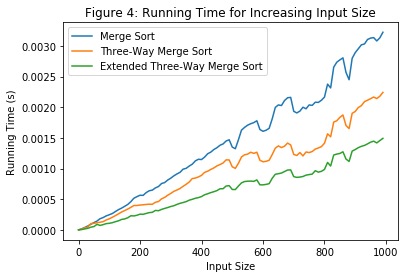

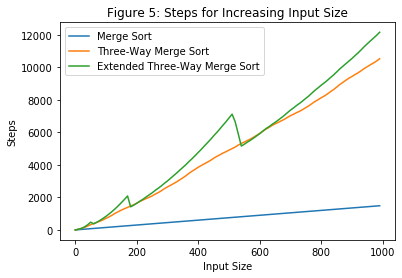

In [18]:
# Creating list for the input size (x-axis).
input_list = []

# Creating list for the running times for each algorithm.
running_time_merge_average = []
running_time_three_average = []
running_time_extended_average = []

# Creating list for the step counting for each algorithm.
steps_merge = []
steps_three = []
steps_extended_3 = []

# We measure the running time for each input size several times and then take the average.
run_number = 10

# Creating lists of different lengths.
for input_size in range(1, 1001, 10):
    
    # The current list will be passed to the function below. It is in reverse order and starts with zero
    # elements.
    current_list = list(range(input_size-1, 0, -1))
    
    # Appending the length of the current list to the input list to keep track of the input size.
    input_list.append(len(current_list))
    
    # Creating lists for the running times that will be reset for each for loop to ensure that we
    # are correctly finding the average running time.
    running_time_merge = []
    running_time_three = []
    running_time_extended = []
    
    # Running each algorithms the specified number of times.
    for i in range(run_number):

        #Measuring the time of merge sort.
        start_merge = time.time()
        merge_sort(current_list)
        end_merge = time.time()
        running_time_merge.append(end_merge - start_merge)

        #Measuring the time of three-way merge sort.
        start_three = time.time()
        threeWayMerge(current_list)
        end_three = time.time()
        running_time_three.append(end_three - start_three)

        #Measuring the time of extended three-way merge sort.
        start_extended = time.time()
        extendedThreeWayMerge(current_list)
        end_extended = time.time()
        running_time_extended.append(end_extended - start_extended)
    
    # Finding the average run times for the current list.
    merge_average = sum(running_time_merge) / run_number
    three_average = sum(running_time_three) / run_number
    extended_average = sum(running_time_extended) / run_number
    
    # Appending the average running time to the running time lists.
    running_time_merge_average.append(merge_average)
    running_time_three_average.append(three_average)
    running_time_extended_average.append(extended_average)
    
    # Ensuring that the global step counter for the three-way and extended three-way merge sort is reset 
    # for each loop.
    steps_three_counter = 0
    steps_extended = 0
    
    #Measuring the steps of merge sort.
    steps_merge.append(merge_sort(current_list))
    
    #Measuring the steps of three-way merge sort.
    steps_three.append(threeWayMerge_steps(current_list))
    
    #Measuring the steps of extended three-way merge sort.
    steps_extended_3.append(extendedThreeWayMerge_steps(current_list)) 

# Plotting the input size and running times. 
plot3 = plt.figure(3)
plt.plot(input_list, running_time_merge_average)
plt.plot(input_list, running_time_three_average)
plt.plot(input_list, running_time_extended_average)
plt.title("Figure 4: Running Time for Increasing Input Size")
plt.xlabel("Input Size")
plt.ylabel("Running Time (s)")
plt.legend(['Merge Sort', 'Three-Way Merge Sort', 'Extended Three-Way Merge Sort'])

# Plotting the input size and running times. 
plot4 = plt.figure(4)
plt.plot(input_list, steps_merge)
plt.plot(input_list, steps_three)
plt.plot(input_list, steps_extended_3)
plt.title("Figure 5: Steps for Increasing Input Size")
plt.xlabel("Input Size")
plt.ylabel("Steps")
plt.legend(['Merge Sort', 'Three-Way Merge Sort', 'Extended Three-Way Merge Sort'])

#raise NotImplementedError()

### Analysis: Merge Sort, Three-Way Merge Sort and Extended Three-Way Merge Sort

1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.

### 1. Complexity
For merge sort we get that $T(n) = 2*T(\frac{n}{2}) + \Theta(n)$: We know that the division step takes a constant time $\Theta(1)$ and that the conquer step takes $\frac{n}{2}$ as we are solving two subproblems which each has the size $\frac{n}{2}$. Lastly, for the combine/merge step it takes $\Theta(n)$ time. This relation can then be solved to a complexity of $O(n*\log_{2}n)$.

For the three-way merge sort algorithm, we get that $T(n) = 3*T(\frac{n}{3}) + \Theta(n)$ since we are now dealing with three subproblems instead of two. Here, the solution gives us the complexity $O(n*\log_{3}n)$.

For the extended three-way, the time complexity depends on the threshold we set for when selection sort should take over the sorting and the input size. If the input size $<$ threshold, then the entire array will be sorted with selection sort. Thus, the complexity would be that of selection sort: $O(n^{2})$. If the input size $\geq$ threshold then both three-way merge sort and selection sort will take place. Hence, the complexity might seem to be the sum of the two complexities: $O(n*\log_{3}n) + O(n^{2})$. However, we will not be doing selection sort on the whole list, and thus we cannot just add the two together. For example, if we have a list of n elements and our threshold is 20, then we would not have $n^{2}$ but rather $20^{2}$ times the number of sublists with 20 elements. Hence, it makes more sense to say that the complexity for the extended three-way merge sort is $O(n*\log_{3}n)$.

### 2. Assumptions Run Time
The running times I have measured for all three algorithms are based on several assumptions. First of all, the code might not be as effective as it could be as there might be ways to optimize the code further and improve the run time.

Furthermore, there might be external factors that impact how fast the algorithm runs, such as the type of computer, processor, other applications interfering. The latter also means that the running times might not be the same if I ran the code on a different computer. To account for some of the factors that might influence the time on a specific computer, I have ensured to run each algorithm several times and average the results. Thus, we get closer to the actual run time. 

Another factor that can impact the running times of the algorithms is the type of input they receive. For example, the algorithms might get a list that is already sorted, which could improve the running time (best-case run time). Conversely, they might get a list that is sorted in such a way that requires the maximum number of comparisons possible for that list length (worst-case run time). To ensure that the list difficulty is the same for all algorithms, they all receive the same input/list. However, to understand their run time better, we would have to test the algorithms on all types of lists, both sorted, less sorted, etc. 

### 3. Comparison of Benchmarks and Theoretical Results
In Figure 4, we can see that as the input size increases, extended three-way merge sort performs best, followed by three-way merge sort, and lastly, merge sort. These results also align with the theoretical results. 

If we look at merge sort and three-way merge sort, we know that the running time of merge is 
$O(n*\log_{2}n)$ whereas the running time of three-way merge is $O(n*\log_{3}n)$. So, for a positive input size, $n>0$, we would have that$O(n*\log_{2}n)>(n*\log_{3}n)$. Thus, the running time of merge sort should be greater than the running time of three-way merge sort, which is also the case in Figure 4. However, in the worst case scenario, the running time of three-way merge sort might not be greater since it has to perform more comparisons than merge sort at each level.

Furthermore, if we examine three-way and extended three-way merges sort, the run time also seems correct because we have optimized the extended one. The optimization of the run time happens because we have examined what would be a suitable threshold for when selecting sort should take over.

Concerning the step size, we can see that merge sort has the lowest amount, followed by three-way merge sort and extended three-way merge-sort. As mentioned above, merge sort has fewer steps than both three-way merge sorts because the latter have more comparison steps and because the extended version uses selection sort. Lastly, we also see spikes in the step sizes for extended three-way merge sort. This happens because when we keep dividing the initial list into three sublists we will sometimes have list lengths which are exactly above the threshold for selection sort. At these values, we see a sharp decrease in run time because merge sort can run again and thus selection sort will do less sorting.

## Question 7. [#ComplexityAnalysis, #ComputationalCritique] 

Analyze and compare the practical run times of regular merge sort (i.e., two-way merge sort), Bucket sort and recursive sort from (5) by producing a plot that illustrates how each running time grows with input size. Make sure to:
1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.


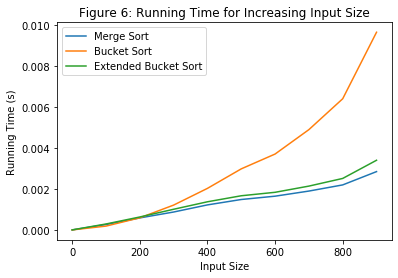

In [19]:
# Creating list for the input size (x-axis).
input_list_2 = []

# Creating list for the running times for each algorithm (y-axis).
running_time_merge_average_2 = []
running_time_bucket_average = []
running_time_recursive_average = []

# Determining the number of run times.
run_number_2 = 10

# Creating lists of different lengths.
for input_size in range(1, 1001, 100):
    
    # The current list will be passed to the function below. It is in reverse order and starts with zero
    # elements.
    current_list = list(range(input_size-1, 0, -1))
    
    # Appending the len of the current list to the input list to keep track of the input size.
    input_list_2.append(len(current_list))
    
    # Creating list for the running times for each algorithm.
    running_time_merge = []
    running_time_selection = []
    
    # Creating lists for the running times that will be reset for each for loop to ensure that we
    # are correctly finding the average running time.
    running_time_merge_2 = []
    running_time_bucket = []
    running_time_recursive = []
    
    # Measuring the running time for the specified number of times.
    for i in range(run_number_2):

        #Measuring the time of merge sort.
        start_merge = time.time()
        merge_sort(current_list)
        end_merge = time.time()
        running_time_merge_2.append(end_merge - start_merge)

        #Measuring the time of three-way merge sort.
        start_bucket = time.time()
        bucketSort(current_list, 3)
        end_bucket = time.time()
        running_time_bucket.append(end_bucket - start_bucket)

        #Measuring the time of extended three-way merge sort.
        start_recursive = time.time()
        extendedBucketSort(current_list, 3)
        end_recursive = time.time()
        running_time_recursive.append(end_recursive - start_recursive)
    
    # Finding the average run times for the current list.
    merge_2_average = sum(running_time_merge_2) / run_number_2
    bucket_average = sum(running_time_bucket) / run_number_2
    recursive_average = sum(running_time_recursive) / run_number_2
    
    # Appending the average running time to the running time lists.
    running_time_merge_average_2.append(merge_2_average)
    running_time_bucket_average.append(bucket_average)
    running_time_recursive_average.append(recursive_average)

# Plotting the input size and running times. 
plt.plot(input_list_2, running_time_merge_average_2)
plt.plot(input_list_2, running_time_bucket_average)
plt.plot(input_list_2, running_time_recursive_average)
plt.title("Figure 6: Running Time for Increasing Input Size")
plt.xlabel("Input Size")
plt.ylabel("Running Time (s)")
plt.legend(['Merge Sort', 'Bucket Sort', 'Extended Bucket Sort'])

#raise NotImplementedError()

### Analysis: Merge Sort, Bucket Sort and Extended Bucket Sort

1. define what each algorithm's complexity is
2. enumerate the explicit assumptions made to assess each run time of the algorithm's run time.
3. and compare your benchmarks with the theoretical result we have discussed in class.

### 1. Complexity
From the analysis in question 6, we saw that the complexity of merge sort is $O(n*\log_{2}n)$.

For bucket sort, we start by creating the buckets and inserting the elements into their appropriate buckets. Thus, we can assume that it takes a constant amount of time for each element $O(n)$. Next, we are sorting the buckets using selection sort, which has a run time of $O(n^{2})$. Lastly, linking all the buckets in the end also takes $O(n)$ as the buckets will have n elements. We then end up with $O(n^{2}) + 2O(n)$. However, for larger input sizes, $n^{2}$ dominates, so the complexity of bucket sort is $O(n^{2})$.

Extended bucket sort uses bucket sort recursively to divide the buckets into smaller buckets until they are $\leq k$. Hence, bucket sort will do most of the work as selection sort only has to sort for lists that are of the base case of recursion, k. Hence, the running time would go toward $O(n)$.

### 2. Assumptions Run Time
Similarly to question 6, I also had to make several assumptions to assess the run time of each algorithm. The code might not be the most efficient, and there can be external factors impacting the measurements. To account for the latter, I have also ran the functions for the same number of input several times and averaged my results. 

Furthermore, it is also important to note here that the input the algorithms receive can significantly impact the run time depending on if the input leads to worst-, average-, or best-case scenario. For example, if we look at bucket sort, the worst-case scenario would take place if all elements are placed into the same bucket. Here, the inside sorting algorithm takes over, which in our case, is selection sort. Since selection sort has a worse run time, we would also see an increase in the run time of the bucket sort itself.

### 3. Comparison Benchmarks and Theoretical Results
In Figure 6, we can see that for a larger input size merge sort has the fastest run time, followed by extended bucket sort, and lastly by bucket sort. This is also in line with the theoretical results as $O(n*\log_{2}n) < O(n) < O(n^{2})$ for $n\geq 0$.

We can also explain these equations in terms of the structure of the algorithms. In bucket sort, selection sort takes over quite fast, which slows down the algorithm for larger input sizes. We can also see this happening in Figure 6 as the curve for bucket sort takes the shape of an exponential function, which aligns with its running time of $O(n^{2})$. 

The running time of extended bucket sort is quite an improvement compared to bucket sort. This improvement can also be seen in the graph as the curve for extended bucket sort takes the shape of a linear curve, which aligns with its linear run time of $O(n)$.

However, merge sort still performs the best which is probably because it does not have an inside sorting algorithm that has a worse running time. 

## [Optional challenge] Question 8 (#SortingAlgorithm and/or #ComputationalCritique) 

Implement k-way merge sort, where the user specifies k. Develop and run experiments to support a hypothesis about the “best” value of k.